In [1]:
import graphviz
import enum

In [2]:
class Names(enum.Enum):
    ANDREW = 'Andrew Popov'
    NATASHA = 'Nathalie Popova'
    MASHA_S = 'Maria Subbotina'
    DASHA = 'Дарья Проскурина'
    MASHA_P = 'Мария Попова'
    PASHA = 'Павел Киреев'
    KSENIA = 'heteroxenia'
    SASHA = 'Александр Антропов'
    TIMOSHA = 'Тимофей Горлов (Live Tim!)'
    
relations: dict[Names, list[Names]] = {}
    
relations[Names.ANDREW] = [Names.NATASHA, Names.MASHA_S, Names.SASHA, Names.MASHA_P]
relations[Names.MASHA_P] = [Names.ANDREW, Names.SASHA, Names.MASHA_S, Names.TIMOSHA]
relations[Names.KSENIA] = [Names.DASHA, Names.MASHA_S, Names.PASHA, Names.TIMOSHA]
relations[Names.NATASHA] = [Names.PASHA, Names.ANDREW, Names.SASHA, Names.TIMOSHA]
relations[Names.PASHA] = [Names.MASHA_S, Names.NATASHA, Names.DASHA, Names.KSENIA]
relations[Names.SASHA] = [Names.MASHA_P, Names.DASHA, Names.ANDREW, Names.NATASHA]
relations[Names.MASHA_S] = [Names.ANDREW, Names.MASHA_P, Names.KSENIA, Names.PASHA]
relations[Names.DASHA] = [Names.KSENIA, Names.PASHA, Names.SASHA, Names.TIMOSHA]
relations[Names.TIMOSHA] = [Names.MASHA_P, Names.DASHA, Names.KSENIA, Names.NATASHA]

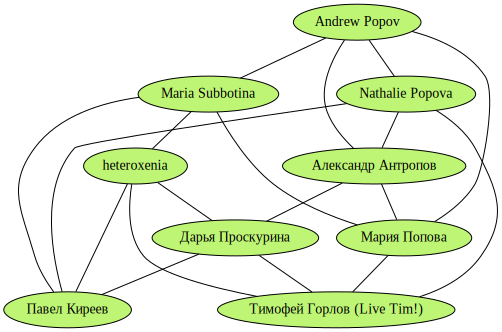

In [3]:
g = graphviz.Graph('Walkr mostik', filename='mostik.gv', format='png', engine='dot')  # sfdp circo dot

for name_from in relations:
    g.node(name_from.value, style='filled', fillcolor='#bef574')

edges: set[tuple[str, str]] = set()
for name_from, name_to_list in relations.items():
    for name_to in name_to_list:
        edge = (name_from.value, name_to.value)
        edge = tuple(sorted(edge))
        edges.add(edge)

for edge in edges:
    g.edge(*edge)
    
g